## Data Cleaning

In [3]:
# read the data and name the columns

import pandas as pd

file_path = '../data/raw/litigation_cases.xlsx'
df = pd.read_excel(file_path, header=5)

In [4]:
# index
df = df.set_index("LIT Leave Decision Date - Year")
df = df.sort_index()

In [5]:
# drop additional columns
df = df.iloc[:-7]

In [6]:
df.tail(10)

,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count
LIT Leave Decision Date - Year,,,,,,,,,
2023,Mexico,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,2.0
2023,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Lack Jurisdictio,Person Concerned,Federal Court,Port of Entry,Fort Erie District,1.0
2023,Libya,Discontinued - Withdrawn at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Regional HQ Prairies NT,1.0
2023,India,Dismissed at Leave,Removal Order,Minister-Removal Order / Admin,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,2.0
2023,Namibia,Dismissed at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,1.0
2023,India,Discontinued - Withdrawn at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,5.0
2023,Senegal,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,1.0
2023,Uganda,Discontinued - Consent at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Port of Entry,Montérégie Border District,1.0
2023,Nigeria,Discontinued - Consent at Leave,Removal Arrangements,A48-Removal Arrang.-Refusal,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,1.0


In [7]:
# converting LIT Litigation Count to integer 
df['LIT Litigation Count'] = df['LIT Litigation Count'].astype(int)

## EDA

Getting a general idea of the data

In [8]:
# total number of cases in the dataset
df['LIT Litigation Count'].sum()

np.int64(48308)

In [9]:
# sum of LIT Litigation Count per year
top_year = df.groupby('LIT Leave Decision Date - Year')['LIT Litigation Count'].sum()
top_year

LIT Leave Decision Date - Year
2018    6621
2019    8277
2020    5249
2021    9625
2022    9473
2023    9063
Name: LIT Litigation Count, dtype: int64

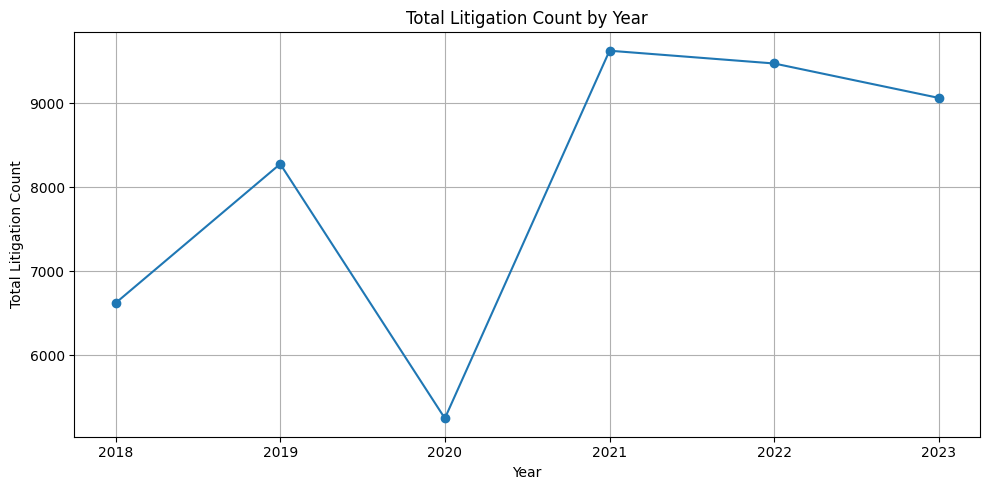

In [10]:
# making a line chart to see trend
import matplotlib.pyplot as plt

top_year.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Total Litigation Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Litigation Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Question to explore: what happened in 2020? COVID?

In [11]:
# total litigation volume per country
top_volume = df.groupby('Country of Citizenship')['LIT Litigation Count'].sum().sort_values(ascending=False)
top_volume

Country of Citizenship
Nigeria                       7819
India                         6825
Iran                          4503
People's Republic of China    3223
Pakistan                      2151
                              ... 
Bhutan                           1
Macao SAR                        1
Iceland                          1
Solomons, The                    1
Vanuatu                          1
Name: LIT Litigation Count, Length: 180, dtype: int64

In [12]:
# trying to understand what types of decisions are made
top_decs = df.groupby('LIT Leave Decision Desc')['LIT Litigation Count'].sum().sort_values(ascending=False)
top_decs

LIT Leave Decision Desc
Dismissed at Leave                   24843
Allowed                               9000
Discontinued - Withdrawn at Leave     8007
Discontinued - Consent at Leave       5923
Allowed - Consent                      486
Not Started at Leave                    38
No Leave Required                        9
Leave Exception                          2
Name: LIT Litigation Count, dtype: int64

In [13]:
# creating a subset of the data for the top 10 countries
top_volume.head(10)

Country of Citizenship
Nigeria                       7819
India                         6825
Iran                          4503
People's Republic of China    3223
Pakistan                      2151
Mexico                        2004
Haiti                         1658
Colombia                      1479
United States of America       901
Philippines                    660
Name: LIT Litigation Count, dtype: int64

In [14]:
top_10_countries = [
    'Nigeria', 'India', 'Iran', "People's Republic of China", 'Pakistan',
    'Mexico', 'Haiti', 'Colombia', 'United States of America', 'Philippines'
]

top_10 = df[df['Country of Citizenship'].isin(top_10_countries)]

To have a closer look into COVID 

In [15]:
top_10 = top_10.copy()

In [16]:
def classify_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year in [2020, 2021]:
        return 'COVID'
    elif year in [2022,  2023]:
        return 'Post-COVID'
    else:
        return 'Other'

top_10['Period'] = top_10.index.to_series().astype(int).apply(classify_period)

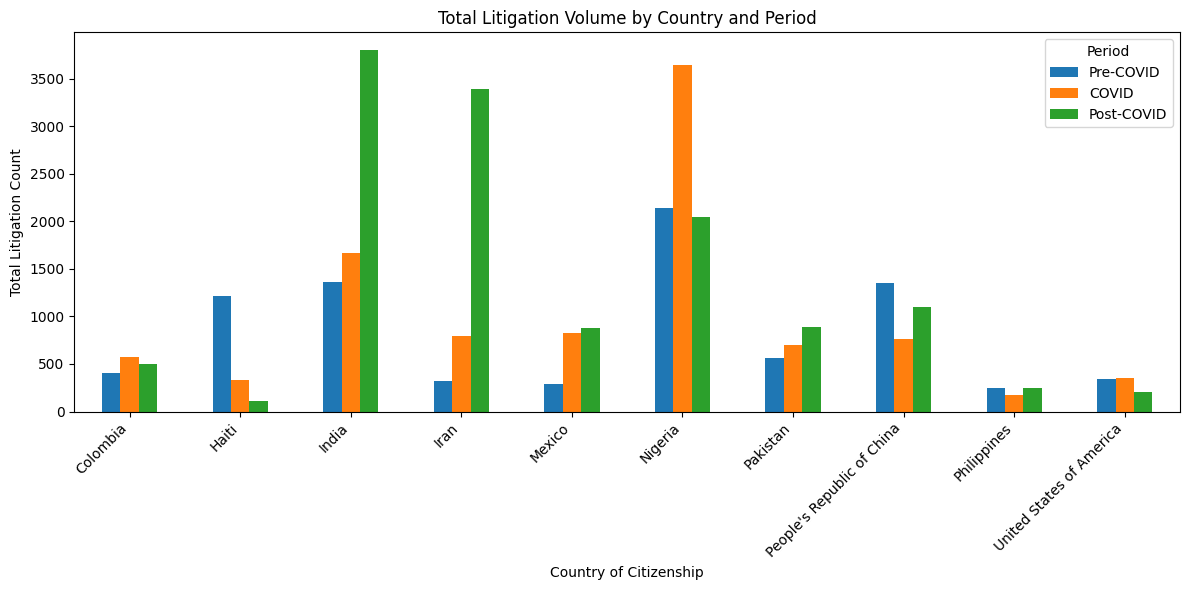

In [17]:
import matplotlib.pyplot as plt

grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce desired order
)

# plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Litigation Volume by Country and Period')
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Litigation Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period')
plt.tight_layout()
plt.show()

In [18]:
# group by country and period, sum litigation count
grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce order
)

# normalize so each country's total = 1
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)

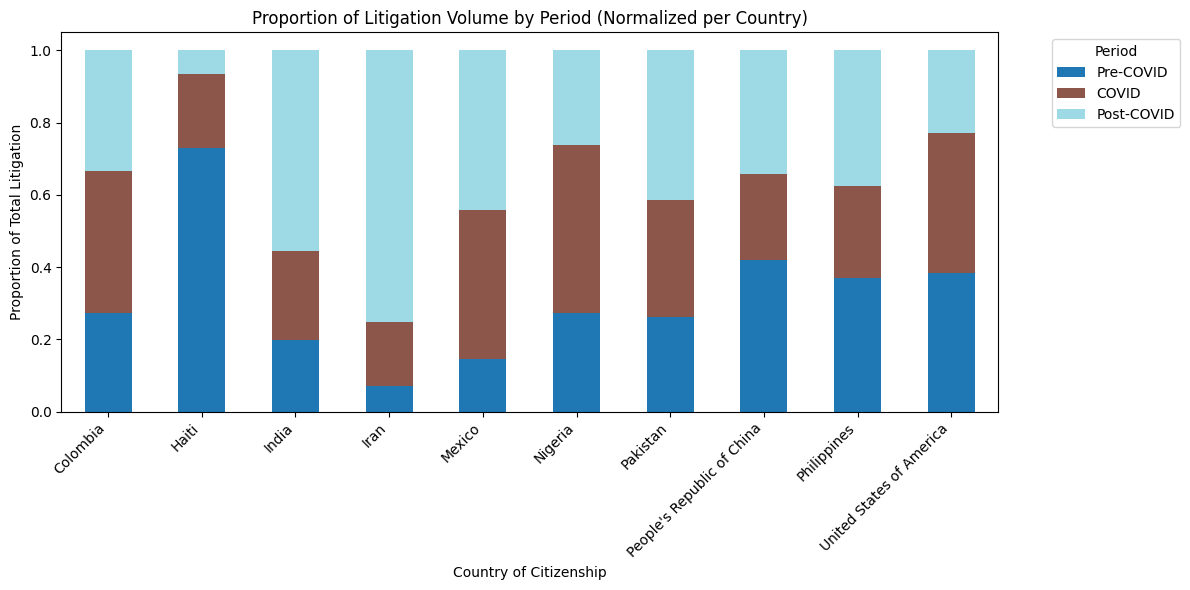

In [19]:
# plot normalized as stacked bar chart
grouped_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Proportion of Litigation Volume by Period (Normalized per Country)')
plt.xlabel('Country of Citizenship')
plt.ylabel('Proportion of Total Litigation')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights: different patterns accross the countries 

- India & Iran: surged post covid

- Nigeria: spiked during covid and reduced after

- China: declined during covid and bounced back after

Zooming in to countries of interest

In [20]:
countries_4 = [
    'Nigeria', 'India', 'Iran', "People's Republic of China"
]

top_4 = df[df['Country of Citizenship'].isin(countries_4)]
top_4['Country of Citizenship'] = top_4['Country of Citizenship'].replace("People's Republic of China", "China")

/var/folders/d4/7ppdfq6s3xb08lmv_w1fpr4m0000gn/T/ipykernel_21485/3520810741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4['Country of Citizenship'] = top_4['Country of Citizenship'].replace("People's Republic of China", "China")


In [21]:
top_4 = top_4.copy()

def classify_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year in [2020, 2021]:
        return 'COVID'
    elif year in [2022,  2023]:
        return 'Post-COVID'
    else:
        return 'Other'

top_4['Period'] = top_4.index.to_series().astype(int).apply(classify_period)

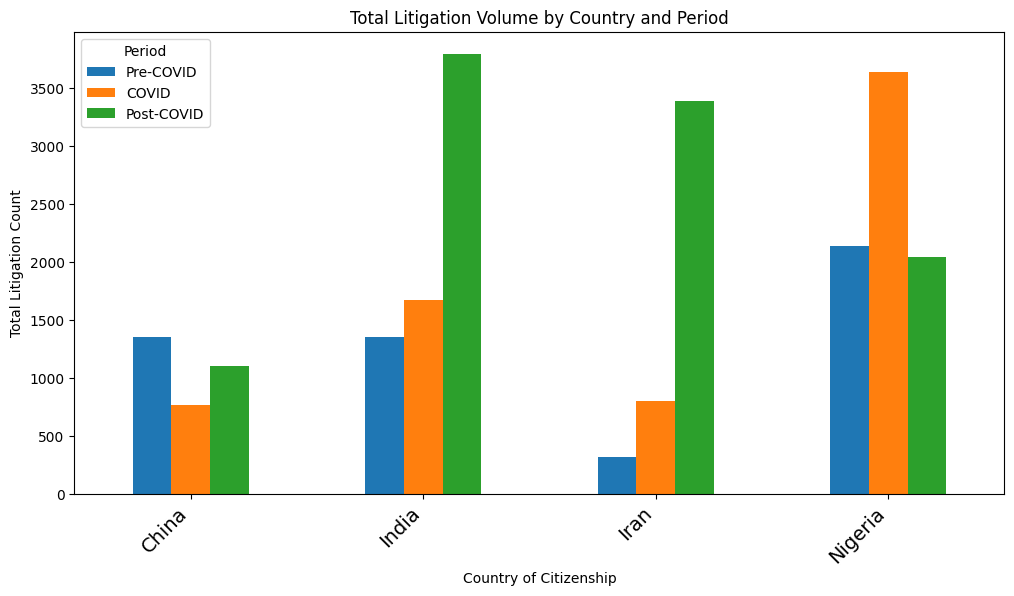

In [22]:
import matplotlib.pyplot as plt

grouped = (
    top_4.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce desired order
)

# plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Litigation Volume by Country and Period')
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Litigation Count')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.legend(title='Period')
plt.show()

In further comparison, we use India as baseline since it has the most volume.

### Decision type comparison

Combine decision types into 4 major groups

In [32]:
decision_groups = {
    'Allowed': 'Allowed',
    'Allowed - Consent': 'Allowed',
    'Discontinued - Withdrawn at Leave': 'Discontinued',
    'Discontinued - Consent at Leave': 'Discontinued',
    'Dismissed at Leave': 'Dismissed at Leave',
}

In [39]:
df['Decision Group'] = df['LIT Leave Decision Desc'].map(decision_groups).fillna('Other')

In [42]:
df.head()

,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count,Decision Group
LIT Leave Decision Date - Year,,,,,,,,,,
2018,People's Republic of China,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Unspecified,1,Dismissed at Leave
2018,Poland,Allowed,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,GTA West IRCC,2,Allowed
2018,Tunisia,Dismissed at Leave,HC Decisions,HC Refusal-Perm Res,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,1,Dismissed at Leave
2018,St. Vincent and the Grenadines,Dismissed at Leave,RPD Decisions,RPD-Not CR/Protected Person,Person Concerned,Federal Court,Inland,Unspecified,10,Dismissed at Leave
2018,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,5,Dismissed at Leave


### Comparing India & Nigeria

In [48]:
# Select relevant countries
subset = df[df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China"])].copy()

# Normalize litigation count within each (country, year)
grouped = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .groupby(level=[0, 1])
    .apply(lambda x: x / x.sum())
)

# Pivot to wide format
pivot = grouped.unstack(fill_value=0)

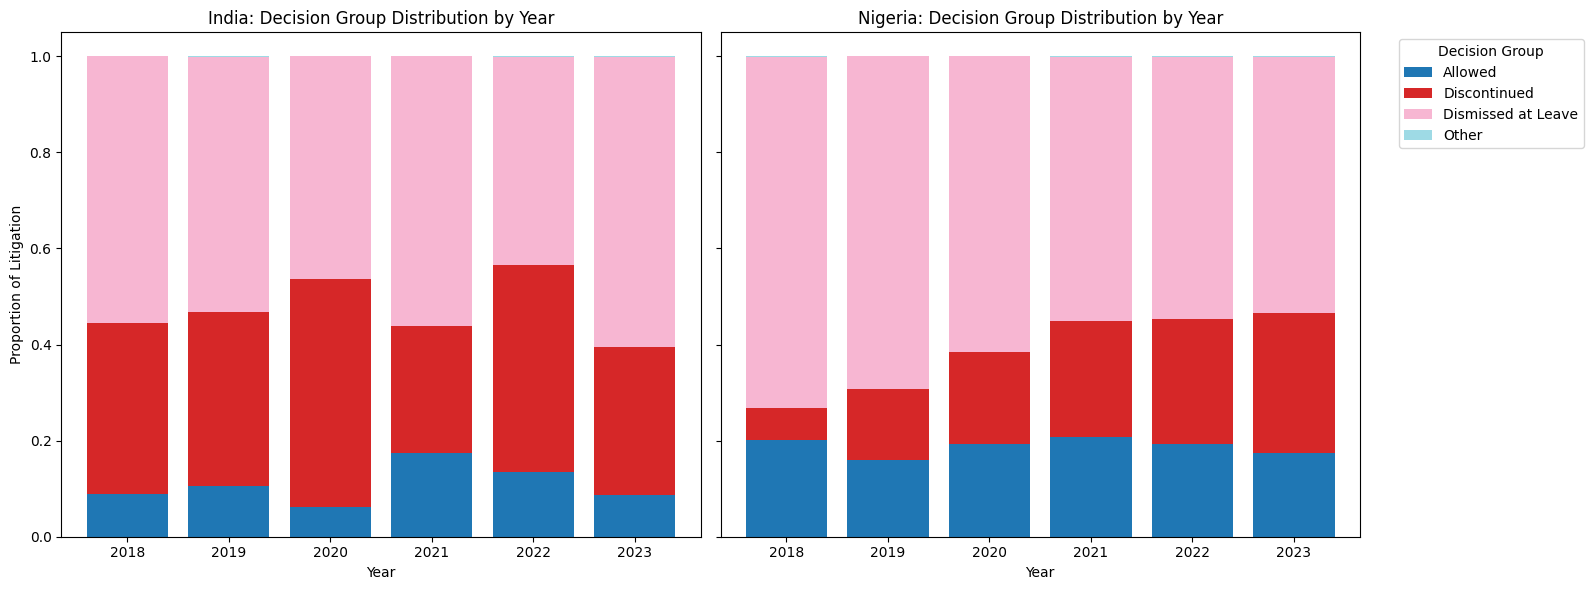

In [49]:
import matplotlib.pyplot as plt

india_case = pivot.loc['India'].copy()
nigeria_case = pivot.loc['Nigeria'].copy()
india_case.index = india_case.index.get_level_values(0)
nigeria_case.index = nigeria_case.index.get_level_values(0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Decision Group Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

nigeria_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('Nigeria: Decision Group Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Decision Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


| Feature                | **India**                                               | **Nigeria**                                                    |
|------------------------|----------------------------------------------------------|----------------------------------------------------------------|
| **Dominant Decision**  | *Dismissed at Leave* remains the largest group.         | *Dismissed at Leave* is also dominant but gradually declining. |
| **Allowed Proportion** | Fluctuates; peaked in 2021, drops again in 2023.        | Consistently higher than India; relatively stable.             |
| **Discontinued Trend** | Grew in 2020–2022, then dropped in 2023.                | Gradually increased since 2018, steady in recent years.        |
| **Overall Shift**      | Higher variability in proportions year to year.         | More stable pattern overall across years.                      |
| **Insight**            | Legal outcomes in India appear more volatile over time. | Nigeria exhibits steadier handling of litigation cases.        |

- For Nigeria: the proportion of discountinued cases increases over the year, why?

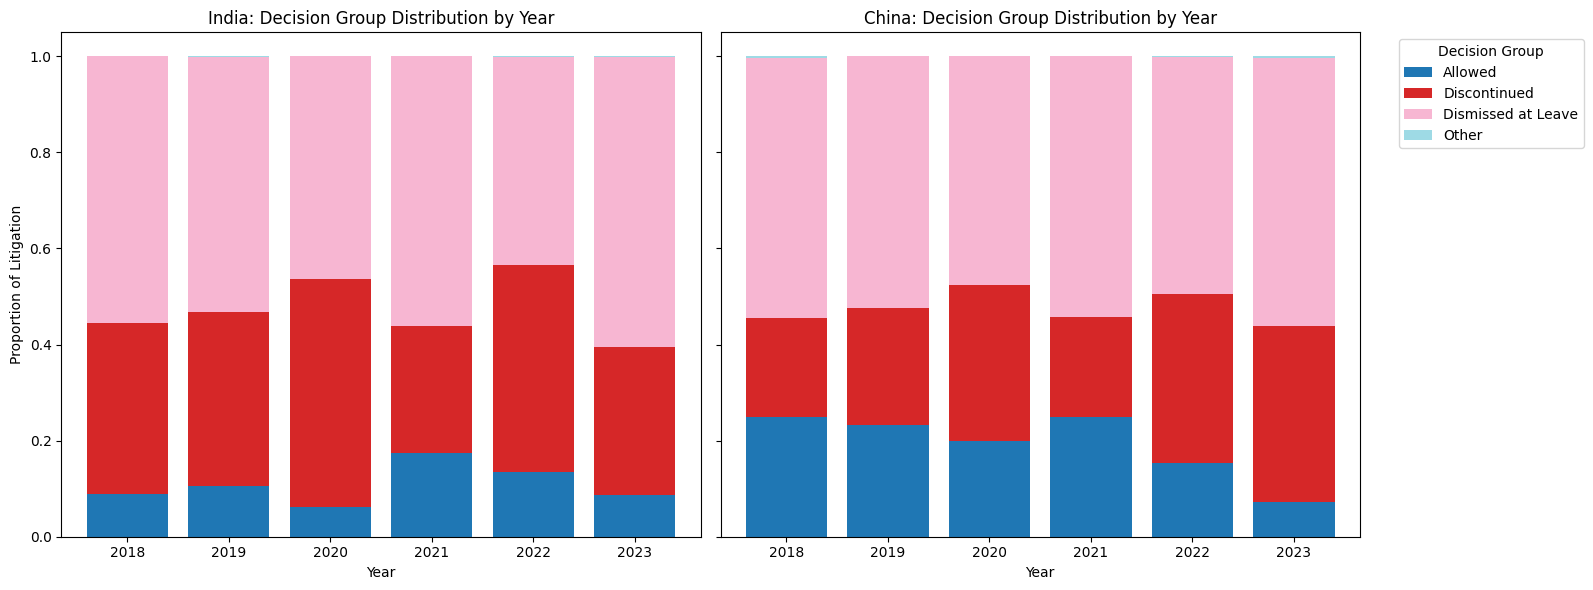

In [50]:
china_case = pivot.loc["People's Republic of China"].copy()
china_case.index = china_case.index.get_level_values(0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Decision Group Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

china_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('China: Decision Group Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Decision Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

| Feature                | **India**                                               | **China**                                                     |
|------------------------|----------------------------------------------------------|---------------------------------------------------------------|
| **Dominant Decision**  | *Dismissed at Leave* consistently dominates.             | *Dismissed at Leave* also dominant, but to a slightly lesser extent. |
| **Allowed Proportion** | Fluctuates; highest in 2021, drops notably in 2023.      | Relatively high and stable until a sharp drop in 2023.        |
| **Discontinued Trend** | Rises in 2020–2022, dips again in 2023.                  | Moderate and steady across years, becoming slightly more prevalent. |
| **Overall Shift**      | More volatility year over year.                          | Smoother transitions in proportions across years.             |
| **Insight**            | Litigation outcomes in India show higher year-to-year fluctuation. | China maintains more stable trends in litigation decisions, until 2023    |


- For China: something happened in 2023, what is it? 

### Case Type Comparison

### Comparing India & Nigeria

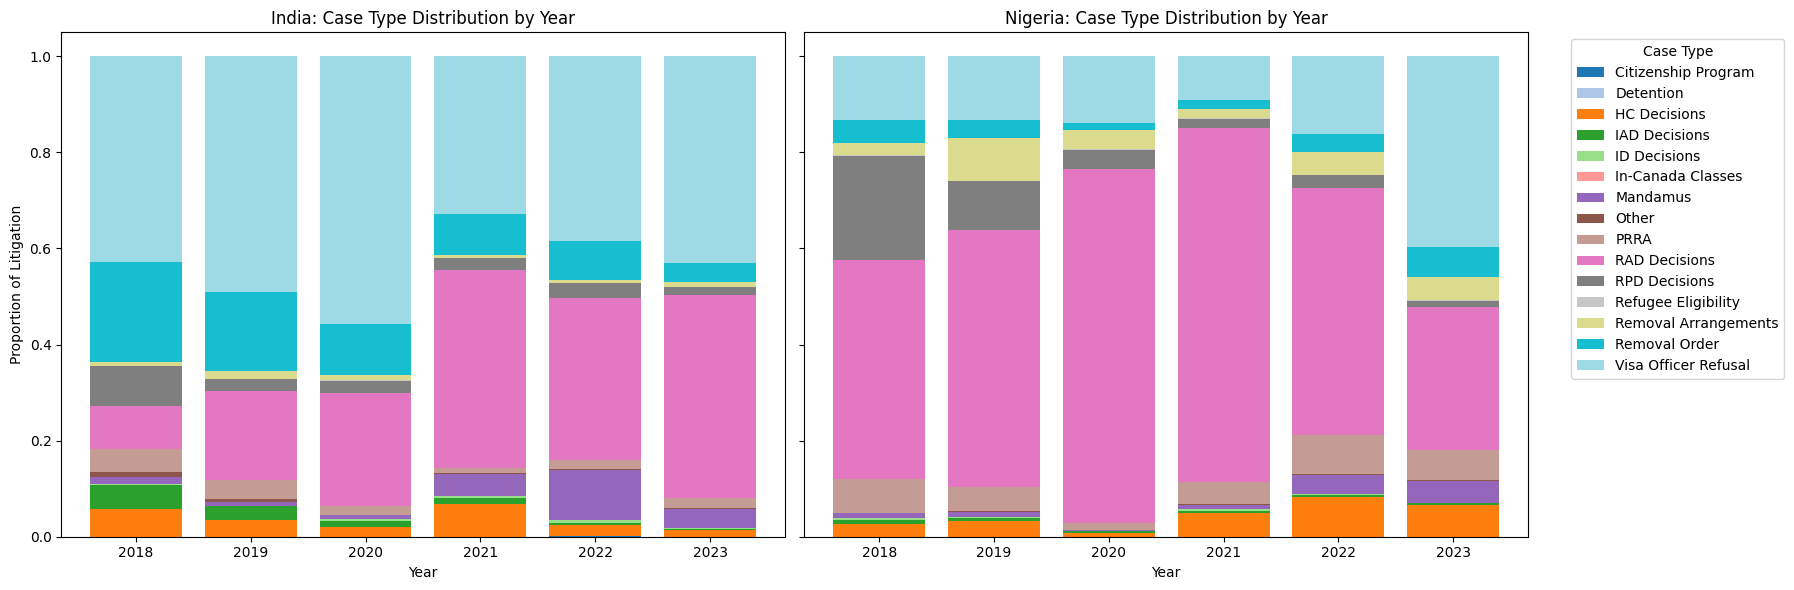

In [33]:
import matplotlib.pyplot as plt

# Filter for India and Nigeria
subset = df[df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China"])].copy()

# Group by Country, Year, and Case Type, then sum
grouped = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .groupby(level=[0,1])
    .apply(lambda x: x / x.sum())  # normalize within each country-year
)

# Pivot to wide format for each country
pivot = grouped.unstack(fill_value=0)
india_case = pivot.loc['India']
nigeria_case = pivot.loc['Nigeria']

# Clean index to just year
india_case.index = india_case.index.get_level_values(0)
nigeria_case.index = nigeria_case.index.get_level_values(0)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# India
india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Case Type Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

# Nigeria
nigeria_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('Nigeria: Case Type Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Case Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 📊 Case Type Comparison Summary: India vs. Nigeria (2018–2023)

| Aspect                      | 🇮🇳 India                                                          | 🇳🇬 Nigeria                                                            |
|----------------------------|--------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Dominant Case Types**    | Visa Officer Refusal, Removal Order                               | RAD Decisions (Refugee Appeal Division)                              |
| **Diversity of Case Types**| High — includes HC, IAD, Mandamus, Citizenship, etc.              | Low — RAD dominates, other types have very small shares              |
| **Stability Over Time**    | Fairly stable distribution across years                           | Slight diversification post-2021, but RAD remains heavily dominant   |
| **Other Observations**     | Litigation reflects broader immigration policy enforcement trends | Heavy concentration suggests refugee system strain or appeal volume  |
| **Policy Signals**         | Appeals and removals common; procedural variation across types    | Signals pressure on refugee processing and consistency of decisions  |


Key Insights:

- Nigeria’s litigation is highly concentrated in refugee-related cases.

- India’s litigation is more diverse, often involving visa refusals, removal orders, and more administrative decisions.

- The consistency in India's mix suggests a more stable litigation source across immigration categories.

- The dominance of RAD in Nigeria may point to systemic refugee claim challenges or stricter asylum scrutiny.

##### Yearly Case Type Trends (2018–2023)

| Country | Period         | Notable Trends                                                                 |
|---------|----------------|---------------------------------------------------------------------------------|
| 🇮🇳 India   | 2018–2020      | Consistent dominance of *Visa Officer Refusal* and *Removal Order* cases.       |
|         | 2021           | Increase in "Other" types (e.g. HC Decisions, Discontinued) — pandemic impact. |
|         | 2022–2023      | Litigation mix stabilizes again; HC involvement slightly rises.                |
| 🇳🇬 Nigeria | 2018–2020      | Overwhelming share of *RAD Decisions* (refugee appeals).                         |
|         | 2021–2022      | Small rise in *Removal*, *Refugee Eligibility*, and other case types.          |
|         | 2023           | RAD remains dominant but slight diversification persists.                      |


Insights: 

- India shows a stable and diverse litigation mix over time.

- Nigeria shows a single-case-type dominance (RAD) that loosens slightly post-COVID, suggesting either backlog relief or shifting litigation trends.

### Comparing India and China

Case Type Comparison (Case Type Group Desc)

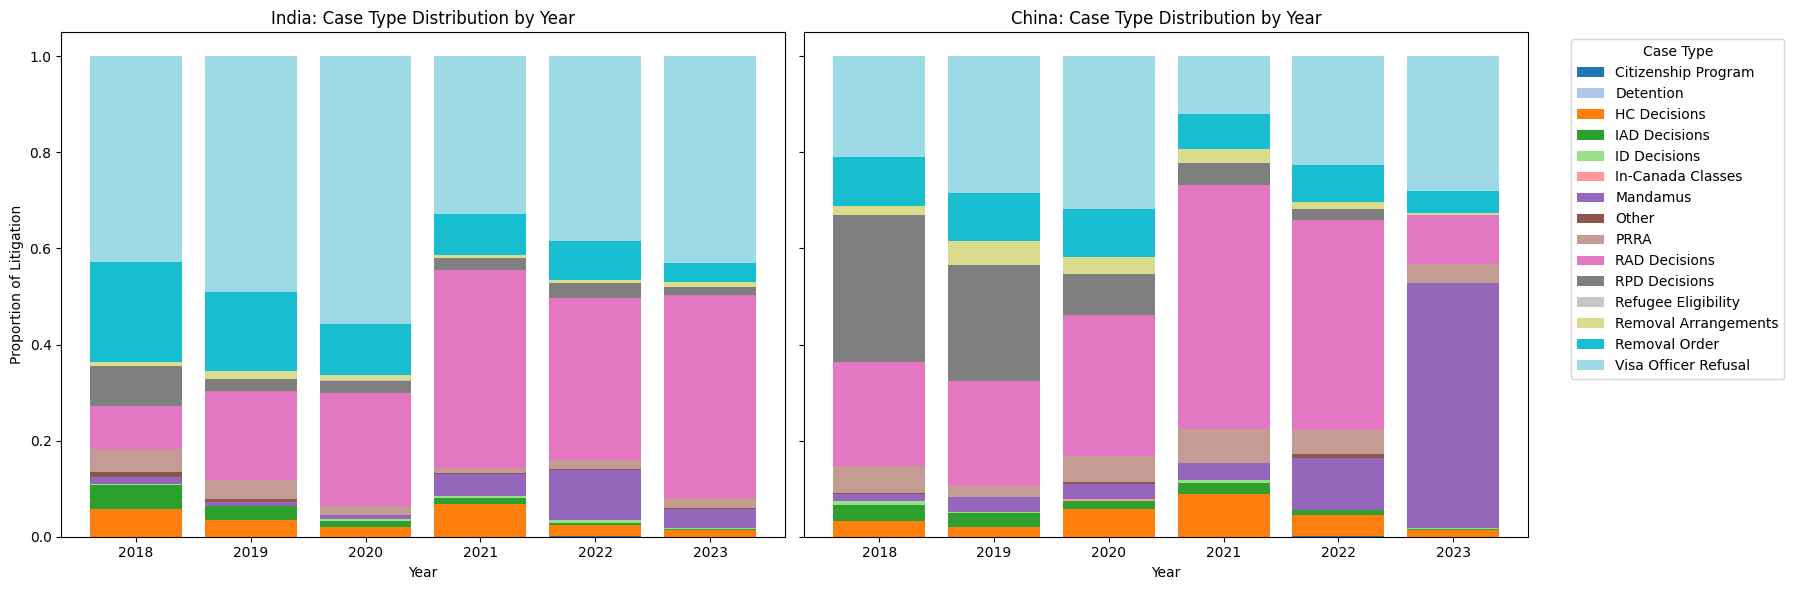

In [34]:
# Group by Country, Year, and Case Type, then sum
grouped = (
    subset.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .groupby(level=[0,1])
    .apply(lambda x: x / x.sum())  # normalize within each country-year
)

# Pivot to wide format for each country
pivot = grouped.unstack(fill_value=0)
india_case = pivot.loc['India']
china_case = pivot.loc["People's Republic of China"]

# Clean index to just year
india_case.index = india_case.index.get_level_values(0)
china_case.index = china_case.index.get_level_values(0)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# India
india_case.plot(kind='bar', stacked=True, ax=axes[0], width=0.8, legend=False, colormap='tab20')
axes[0].set_title('India: Case Type Distribution by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Proportion of Litigation')
axes[0].tick_params(axis='x', rotation=0)

# China
china_case.plot(kind='bar', stacked=True, ax=axes[1], width=0.8, legend=True, colormap='tab20')
axes[1].set_title('China: Case Type Distribution by Year')
axes[1].set_xlabel('Year')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Case Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Somehow similar patterns until 2023, when Mandamus surged in China - what happened?

Mandamus: Legal remedy used when an application has been delayed or improperly handled by immigration authority.

### 📊 Case Type Comparison Summary: India vs. China (2018–2023)

| **Aspect**              | 🇮🇳 India                                      | 🇨🇳 China                                               |
|-------------------------|-----------------------------------------------|--------------------------------------------------------|
| **Dominant Case Types** | Visa Officer Refusal, RPD, RAD, Removal Order | RAD Decisions, Mandamus (2023), PRRA, RPD              |
| **Diversity of Case Types** | High — includes HC, IAD, Mandamus, Citizenship, etc. | Moderate — lower diversity until 2023; Mandamus rises |
| **Stability Over Time** | Fairly stable litigation mix year to year     | Shift in 2023 — Mandamus surge shifts proportions      |
| **Other Observations**  | Reflects broader immigration enforcement      | 2023 spike may indicate systemic delay or pressure     |
| **Policy Signals**      | Appeals and removals steady over time         | Mandamus rise suggests delays in decision-making       |


Insights

- India’s litigation remains relatively stable and diverse, with consistent presence of visa refusals and refugee-related appeals.
- China showed a comparable litigation pattern until 2022, but 2023 marks a notable shift with a sharp rise in Mandamus applications.
- The Mandamus spike in China (2023) could indicate:
- Backlogs in application processing.
- Legal pressure for delayed decisions.
- Policy bottlenecks (e.g. post-COVID recovery or shifting IRCC priorities).
- The proportional drop in Visa Officer Refusals in China suggests possible procedural shifts or temporary case backlogs in that stream.
- India’s stability might reflect a broader and predictable stream of administrative decisions, while China’s volatility suggests changing litigation incentives or access dynamics.

### Trend by Year

##### Decision Types

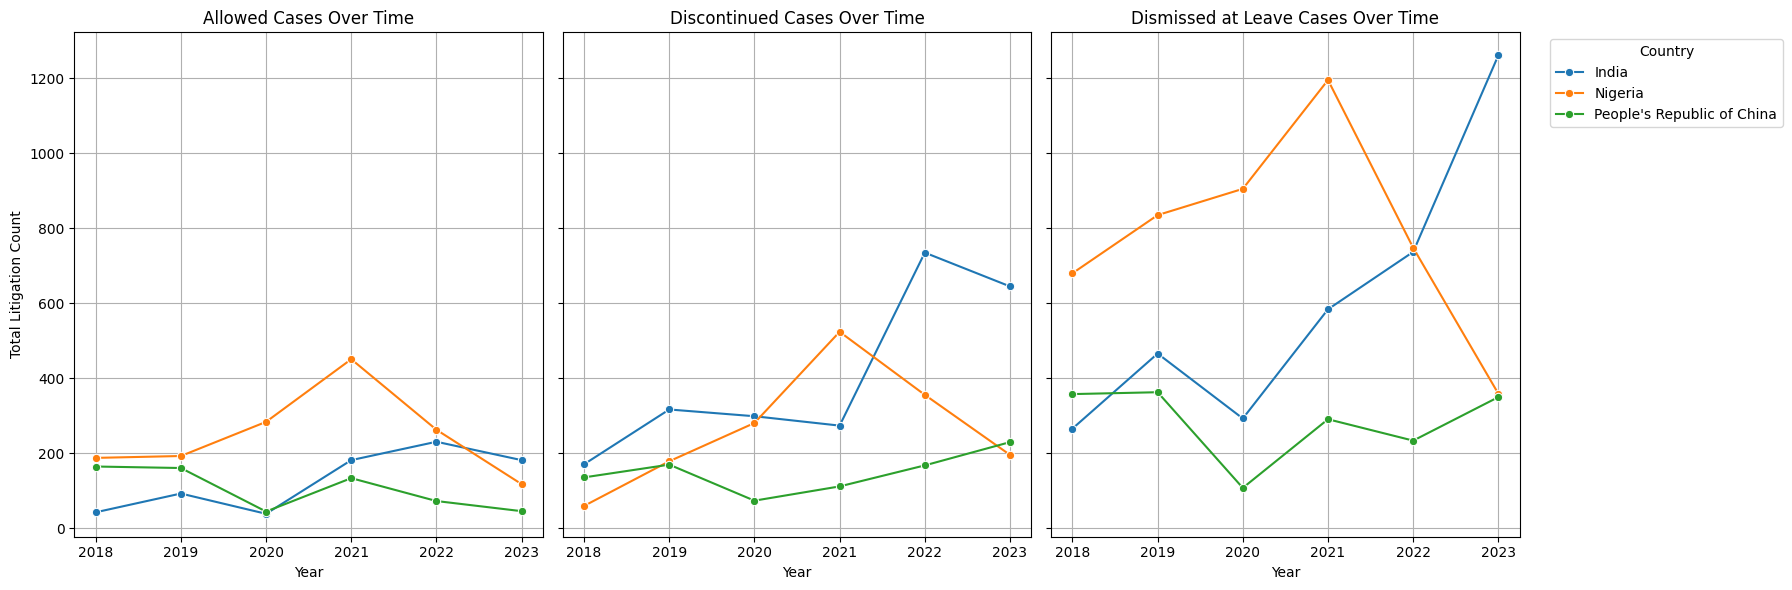

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter relevant data
df_filtered = df[
    df['Decision Group'].isin(['Discontinued', 'Dismissed at Leave', 'Allowed']) & 
    df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China"])
]

# Group the data
grouped = (
    df_filtered
    .groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship', 'Decision Group'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Set up 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

decision_groups = ['Allowed', 'Discontinued', 'Dismissed at Leave']

for i, case in enumerate(decision_groups):
    sns.lineplot(
        data=grouped[grouped['Decision Group'] == case],
        x='LIT Leave Decision Date - Year',
        y='LIT Litigation Count',
        hue='Country of Citizenship',
        marker='o',
        ax=axes[i]
    )
    axes[i].set_title(f'{case} Cases Over Time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Litigation Count' if i == 0 else '')
    axes[i].grid(True)

# Move legend to the third plot only
for i in range(2):
    axes[i].legend_.remove()
axes[2].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- The volumn for Dimissed at Leave dominates accross all decision types, followed by Discontinued.
- For Nigeria, a sharp drop across all decision types since 2021 - something happened in Nigeria in 2021? 
- For India, a significant raise in Discontinued since 2021 and Dismissed at Leave since 2020 - Allowed also raise, seems fine?
- For China, shifting from Allowed to Discontinued and Dismissed at Leave - must have been some policy changes regarding immigration for China?

##### Case Types
only inclueded case types with total litigation count over 100 for at least one country

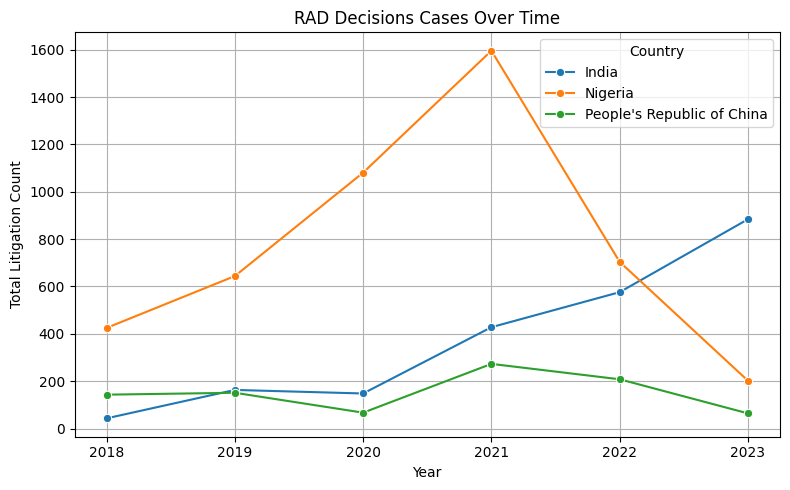

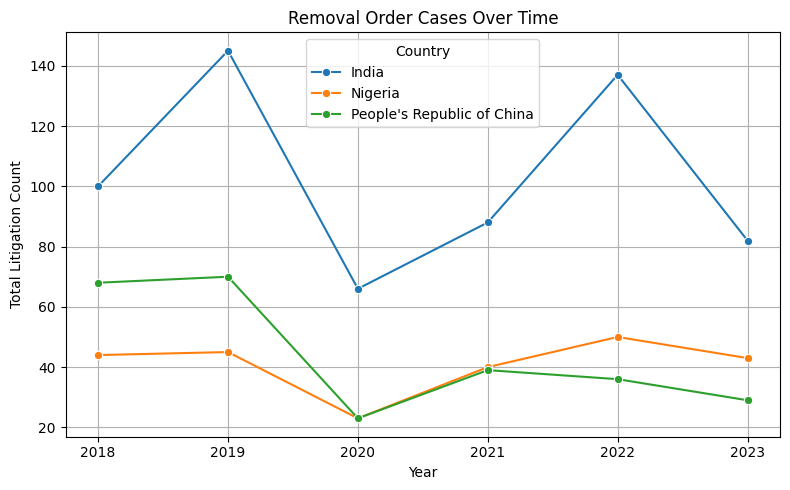

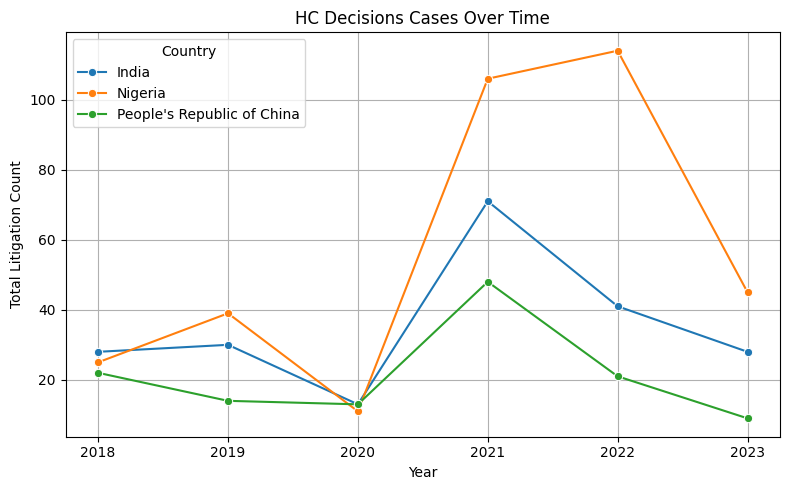

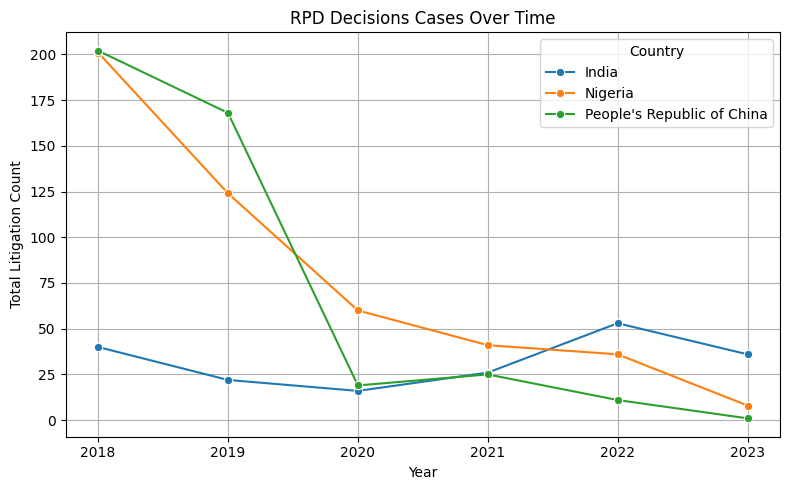

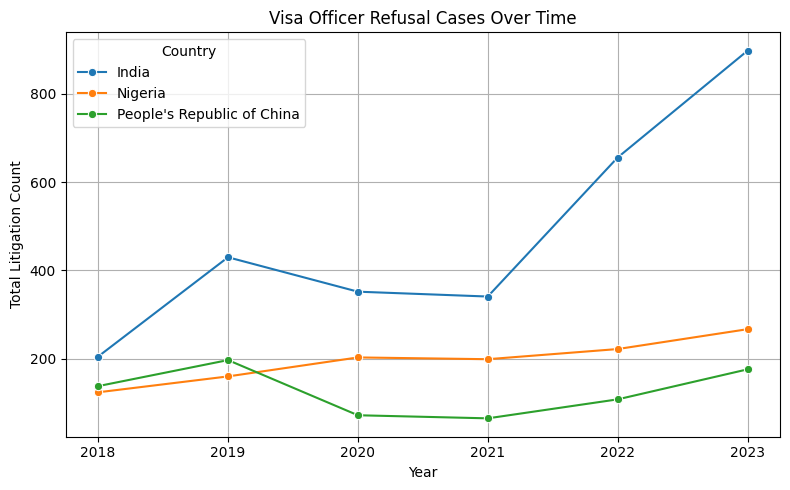

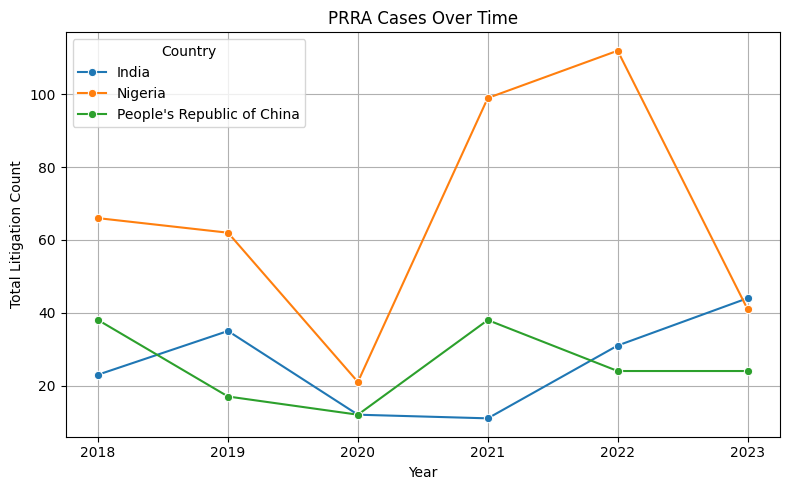

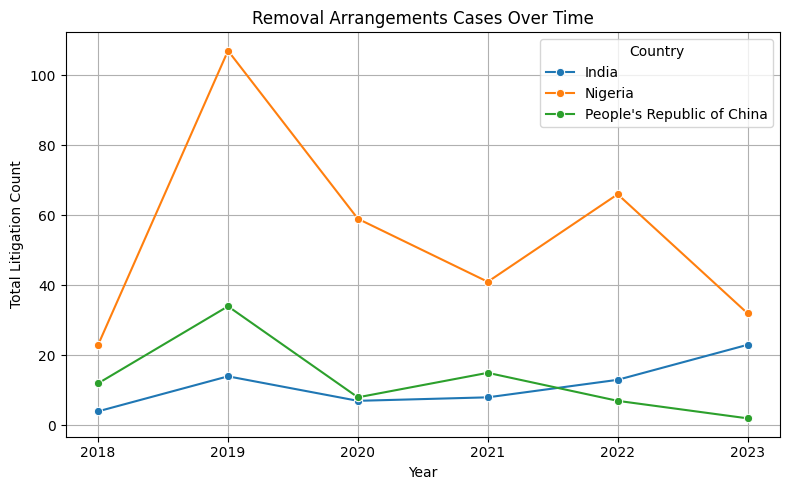

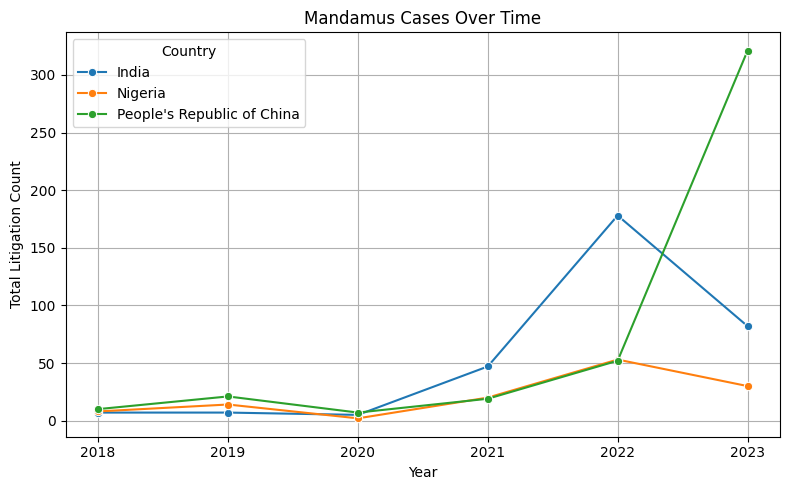

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the case types to include
included_case_types = [
    'RAD Decisions', 'Removal Order', 'HC Decisions', 'RPD Decisions',
    'Visa Officer Refusal', 'PRRA', 'Removal Arrangements', 'Mandamus'
]

# Filter relevant data
subset = df[
    df['Country of Citizenship'].isin(['India', 'Nigeria', "People's Republic of China"]) &
    df['LIT Case Type Group Desc'].isin(included_case_types)
].copy()

# Group by year, country, and case type — sum counts
grouped = (
    subset.groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship', 'LIT Case Type Group Desc'])['LIT Litigation Count']
    .sum()
    .reset_index()
)

# Plot one chart per selected case type
for case_type in included_case_types:
    data = grouped[grouped['LIT Case Type Group Desc'] == case_type]
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=data,
        x='LIT Leave Decision Date - Year',
        y='LIT Litigation Count',
        hue='Country of Citizenship',
        marker='o'
    )
    plt.title(f'{case_type} Cases Over Time')
    plt.xlabel('Year')
    plt.ylabel('Total Litigation Count')
    plt.grid(True)
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()

- RAD (Refugee Appeal Division) Decision dominants for all 3 countries. Since 2021, it droped for Nigeria (sharply) and China, but increased for India.
- Didn't look too much into the rest because of the low volume.

In [81]:
df['LIT Case Type Group Desc'].unique()

array(['RAD Decisions', 'Removal Order', 'HC Decisions', 'RPD Decisions',
       'Visa Officer Refusal', 'PRRA', 'Other', 'IAD Decisions',
       'Removal Arrangements', 'Mandamus', 'ID Decisions',
       'In-Canada Classes', 'Refugee Eligibility', 'Citizenship Program',
       'DFN', 'Detention', 'Danger Opinions'], dtype=object)

Breakdown Leave Decision

In [35]:
top_10.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum()

Country of Citizenship    Period      LIT Leave Decision Desc          
Colombia                  COVID       Allowed                              143
                                      Allowed - Consent                      1
                                      Discontinued - Consent at Leave       14
                                      Discontinued - Withdrawn at Leave    129
                                      Dismissed at Leave                   290
                                                                          ... 
United States of America  Post-COVID  Dismissed at Leave                   109
                          Pre-COVID   Allowed                               48
                                      Discontinued - Consent at Leave       10
                                      Discontinued - Withdrawn at Leave     29
                                      Dismissed at Leave                   259
Name: LIT Litigation Count, Length: 164, dtype: int64

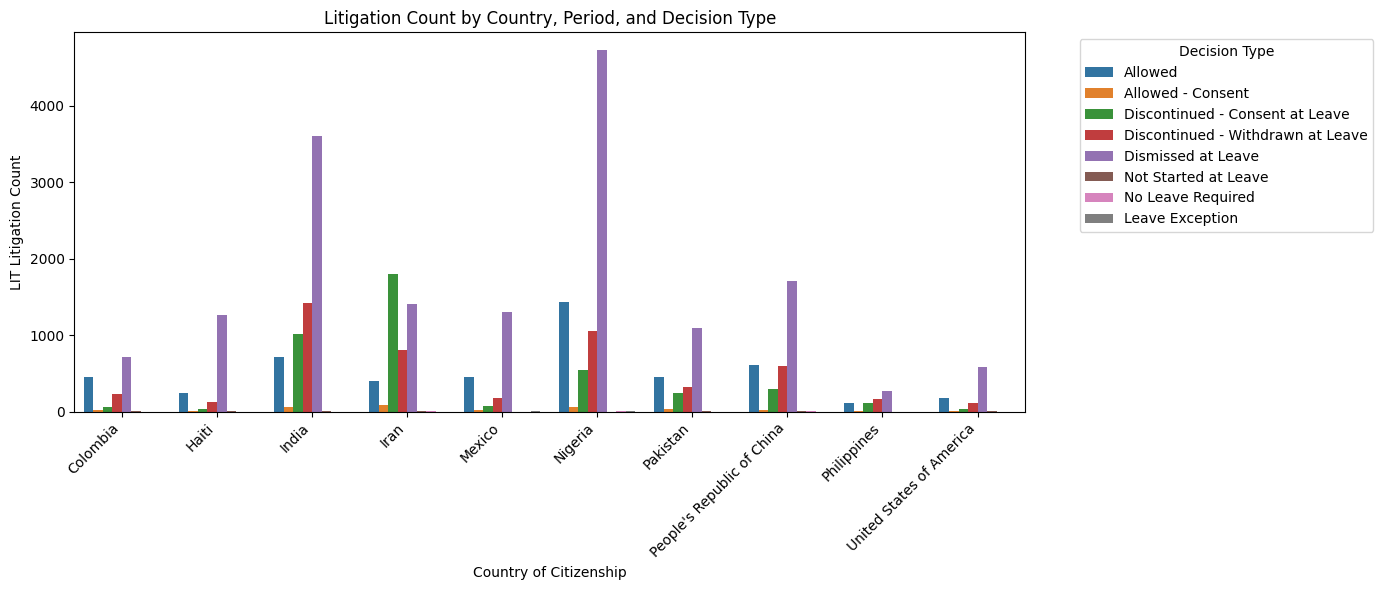

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset index to make columns
decision_breakdown = top_10.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum().reset_index()

# plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=decision_breakdown,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Litigation Count by Country, Period, and Decision Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
# focusing on top 5 decisions

top_5_decisions = (
    top_10['LIT Leave Decision Desc']
    .value_counts()
    .head(5)
    .index.tolist()
)

top_decs = top_10[top_10['LIT Leave Decision Desc'].isin(top_5_decisions)]

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset index to make columns
decision_breakdown = top_decs.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum().reset_index()

# plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=decision_breakdown,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Litigation Count by Country, Period, and Decision Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

KeyError: 'Country of Citizenship'

Zooming in to look at India

In [89]:
india_only = top_decs[top_decs['Country of Citizenship'] == 'India']

In [84]:
# set categorical order for Period
period_order = ['Pre-COVID', 'COVID', 'Post-COVID']
india_grouped['Period'] = pd.Categorical(india_grouped['Period'], categories=period_order, ordered=True)

# plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=india_grouped,
    x='Period',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Top 5 Leave Decisions in India by Period')
plt.xlabel('Period')
plt.ylabel('Total Litigation Count')
plt.legend(title='Decision Type')
plt.tight_layout()
plt.show()

NameError: name 'india_grouped' is not defined